In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Виконуємо розрахунки для першого набору даних

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

import pandas as pd
import os

file_path = os.path.join('/content/drive/MyDrive/data1/data', 'data_2d.csv')
data_2d = pd.read_csv(file_path)

# Виведення перших кількох рядків для перевірки
print(data_2d.head())

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

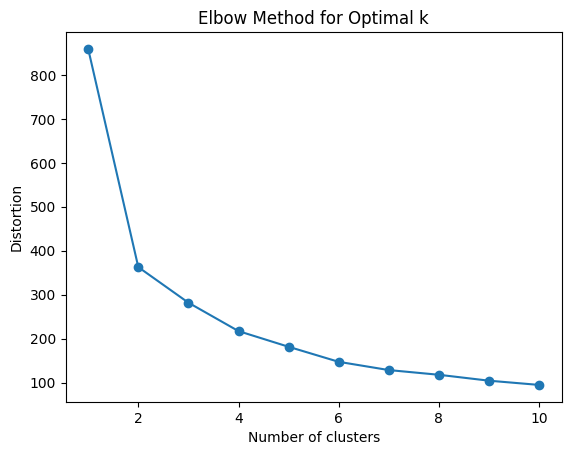

In [4]:


# Визначення оптимальної кількості кластерів для двовимірного датасету
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_2d)
    distortions.append(kmeans.inertia_)

# Виведення графіка для визначення оптимальної кількості кластерів
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()



# З графіка чітко видно, що кількість кластерів 2

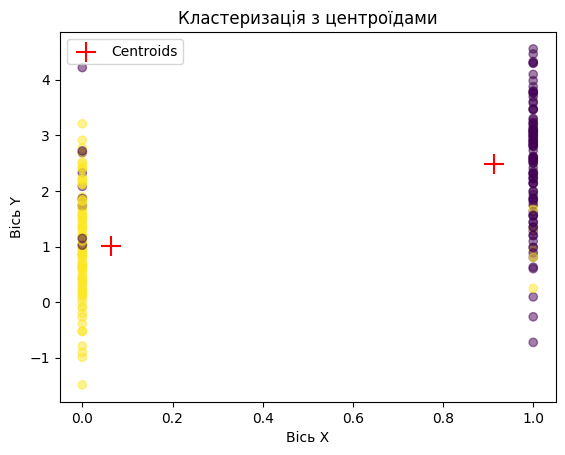

In [20]:
# Вибір оптимальної кількості кластерів для двовимірного датасету
optimal_k_2d = 2

# Використання K-means для кластеризації двовимірного датасету з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_k_2d , n_init=20, random_state=0)
labels = kmeans.fit_predict(data_2d)
centroids = kmeans.cluster_centers_

# Візуалізація кластерів
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='+', s=200, label='Centroids')
plt.title('Кластеризація з центроїдами')
plt.xlabel('Вісь X')
plt.ylabel('Вісь Y')
plt.legend()
plt.show()

# Виконуємо те ж саме для другого набору даних

In [6]:
file_path2 = os.path.join('/content/drive/MyDrive/data1/data', 'mnist.csv')
mnist = pd.read_csv(file_path2)

# Виведення перших кількох рядків для перевірки
print(mnist.head())

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

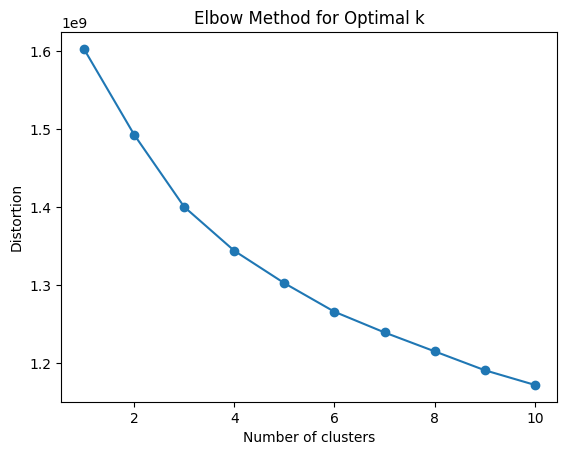

In [7]:
# Визначення оптимальної кількості кластерів для двовимірного датасету
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(mnist)
    distortions.append(kmeans.inertia_)

# Виведення графіка для визначення оптимальної кількості кластерів
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


## Методом ліктя складно встановити точне значення кількості кластерів. Через це використаємо алгоритм РСА для зменшення розмірності

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


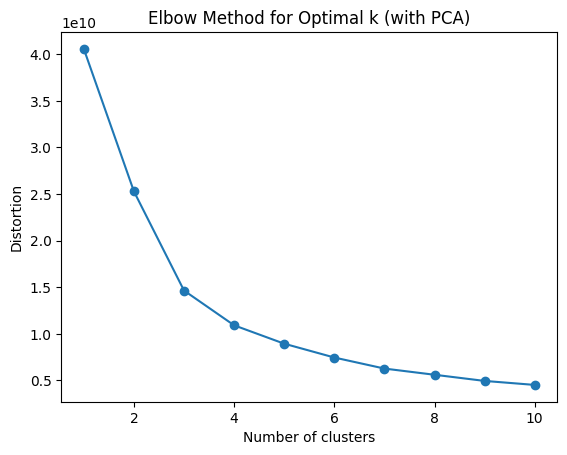

In [10]:
# Завантаження датасету MNIST
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Застосування PCA для зменшення розмірності до 2 головних компонент
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist.data)

# Визначення оптимальної кількості кластерів за допомогою K-means та PCA
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=0)
    kmeans.fit(mnist_pca)
    distortions.append(kmeans.inertia_)

# Візуалізація графіка
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k (with PCA)')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


## Схоже що лікоть вказує на кількість кластерів 3. Але для впевненості ще використаємо додатково метод силуету


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

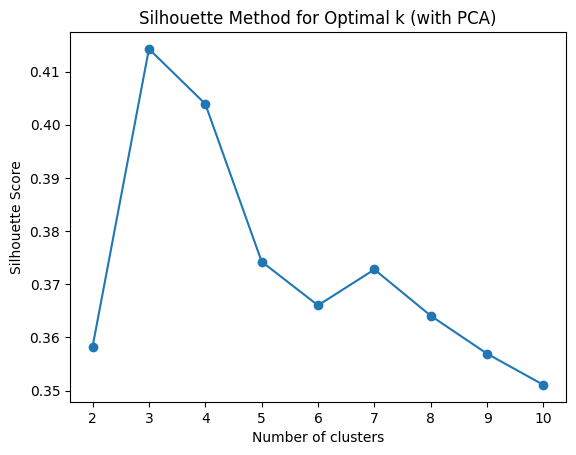

In [13]:
# Визначення оптимальної кількості кластерів за допомогою K-means та PCA з використанням методу силуету
silhouette_scores = []
for i in range(2, 11):  # Від 2 до 10 кластерів
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(mnist_pca)
    silhouette_avg = silhouette_score(mnist_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка методу силуету
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k (with PCA)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# З графіка визначаємо, що кількість кластерів рівна 3м

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


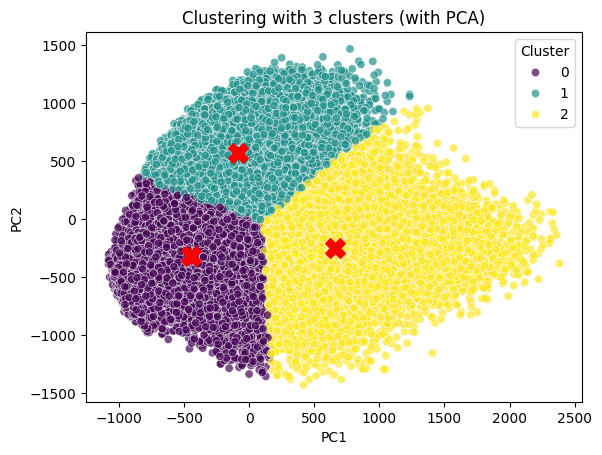

In [15]:

# Візуалізація кластерів
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=best_k, random_state=0)
labels = kmeans.fit_predict(mnist_pca)

# Додайте мітки кластерів до даних
data_with_labels = pd.DataFrame(mnist_pca, columns=['PC1', 'PC2'])
data_with_labels['Cluster'] = labels

# Візуалізація кластерів на площині PC1 і PC2
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_with_labels, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Clustering with {best_k} clusters (with PCA)')
plt.show()